# 1. DATA LOADING

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Healthcare-Diabetes.csv")

df

# 2. DATA CLEANSING

In [5]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. PREPROCESSING DATA

In [10]:
df_new = df.copy()
df_new = df_new[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]]
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [35]:
df_new2 = df.copy()
df_new2

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [36]:
df_new2.drop(columns=["Id"],inplace = True)

In [37]:
df_new2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


# 4. Ekpslorasi Data Analitik (EDA)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

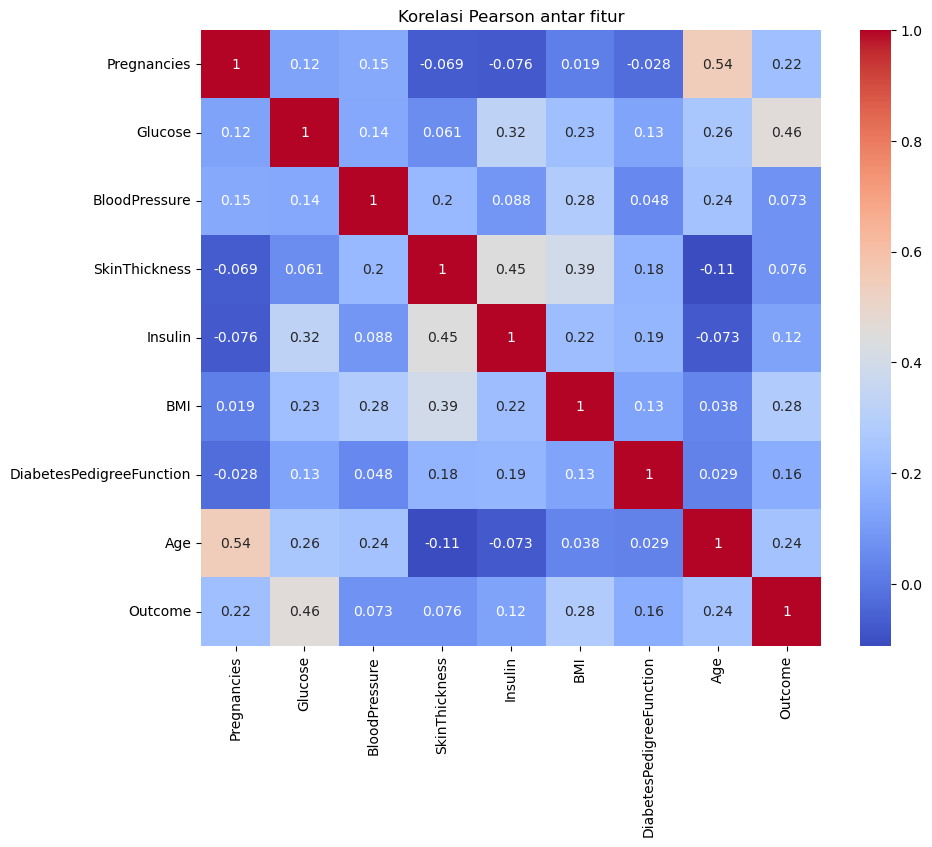

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new2.corr(),annot=True, cmap='coolwarm')
plt.title("Korelasi Pearson antar fitur")
plt.show()


# 5. Pelatihan dan Pengujian Model

Outcome ---> 1. ada diabetes
Outcome ---> 0. Tidak ada diabetes

In [50]:
X = df_new2.drop(columns=["Outcome"])
Y = df_new2["Outcome"]

In [49]:
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [51]:
Y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## 5.1. Pelatihan Machine Learning

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [54]:
# melakukan pelatihan dan pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [58]:
# memanggil model
model_knn = KNeighborsClassifier(n_neighbors=5)

# melatih model
model_knn.fit(X_train, Y_train)

# menguji model
Y_pred = model_knn.predict(X_test) # Y_Test tidak masuk karena dia akan jadi kunci jawaban                                                                                         

In [61]:
#evaluasi model
#akurasi
print(f"AKURASI MODEL KNN :", accuracy_score(Y_test,Y_pred)*100)

AKURASI MODEL KNN : 86.46209386281588


In [67]:
print("Hasil Klasifikasi REPORT KNN:", classification_report(Y_test,Y_pred))

Hasil Klasifikasi REPORT KNN:               precision    recall  f1-score   support

           0       0.91      0.89      0.90       367
           1       0.79      0.82      0.80       187

    accuracy                           0.86       554
   macro avg       0.85      0.85      0.85       554
weighted avg       0.87      0.86      0.87       554



In [70]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

NameError: name 'confusion_matrix' is not defined

<Figure size 600x400 with 0 Axes>